# QUESTION 1

Let’s use a function named isPhoneNumber() to check whether a string matches this pattern,
returning either True or False.

Regular expressions, called regexes for short, are descriptions for a pattern of text. For example, a
\d in a regex stands for a digit character—that is, any single numeral 0 to 9. The regex \d\d\d-\d\d\d-
\d\d\d\d is used by Python to match the text containing phone numbers in the isPhoneNumber()
function: a string of three numbers, a hyphen, three more numbers, another hyphen, and four
numbers. Any other string would not match the \d\d\d-\d\d\d-\d\d
\d\d regex. But regular expressions can be much more sophisticated. For example, adding a 3 in
curly brackets ({3}) after a pattern is like saying, “Match this pattern three times.” So the slightly
shorter regex \d{3}-\d{3}-\d{4} also matches the correct phone number format.

All the regex functions in Python are in the re module. Enter the following into an interactive shell
to import this module:

In [19]:
import re

In [20]:
def isPhoneNumber(text):
  phone_pattern = r'[0-9]{3}-\d\d\d-[0-9]{4}'
  return bool(re.search(phone_pattern, text))

Example usage:

In [21]:
# "123-456-7890" matches a phone number: True
print("\"123-456-7890\" matches a phone number: "+ str(isPhoneNumber("123-456-7890")))

"123-456-7890" matches a phone number: True


In [22]:
# "abc-456-7890" matches a phone number: False
print("\"abc-456-7890\" matches a phone number: "+str(isPhoneNumber("abc-456-7890")))

"abc-456-7890" matches a phone number: False


In [23]:
# "Here's a number: 123-456-7999" matches a phone number: True
print("\"Here's a number: 123-456-7999\" matches a phone number: "+str(isPhoneNumber("Here's a number: 123-456-7999")))

"Here's a number: 123-456-7999" matches a phone number: True


## Python code: Entire program

In [28]:
import re

def isPhoneNumber(text):
    phone_pattern = r'[0-9]{3}-\d{3}-\d{4}'
    return bool(re.search(phone_pattern, text))

if __name__ == "__main__":
    print(str(isPhoneNumber("123-456-7890")))  # TRUE
    print(str(isPhoneNumber("This has a number 450-213-4221")))  # TRUE
    print(str(isPhoneNumber("123-421-542a")))  # FALSE


True
True
False


# QUESTION 2

Unix-based operating systems usually include a tool named tail. It displays the last 10 lines of a
file whose name is provided as a command line argument.


Write a program that provides the same behavior i.e. the user can specify how many lines to print
from the terminal. Display an appropriate error message if the file requested by the user does not
exist, or if the command line argument is omitted.

Extend this program to display the: (a) first n lines of a file i.e. head and (b) the middle n lines of a file i.e. middle.

## Python code: Tail, head, middle functions

In [ ]:
import os

def tail(filename, n):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            if n > len(lines):
                n = len(lines)
            for line in lines[-n:]:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: The file '{filename}' does not exist.")

def head(filename, n):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            if n > len(lines):
                n = len(lines)
            for line in lines[:n]:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: The file '{filename}' does not exist.")

def middle(filename, n):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            total_lines = len(lines)
            if n > total_lines:
                n = total_lines
            start_index = (total_lines - n) // 2
            for line in lines[start_index:start_index + n]:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: The file '{filename}' does not exist.")

### Example usage of functions using example helper method with sample.txt

In [ ]:
def example(filename,mode,n):
  try:
      n = int(n)
      mode = mode.lower()
      if mode == 'tail':
          tail(filename, n)
      elif mode == 'head':
          head(filename, n)
      elif mode == 'middle':
          middle(filename, n)
      else:
          print("Error: Invalid mode.")
  except ValueError:
      print("Error: n must be an integer.")

#### Creating a sample text file

In [ ]:
sample_text = """This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10
This is line 11
This is line 12
This is line 13
This is line 14
This is line 15"""

with open('sample.txt', 'w') as file:
    file.write(sample_text)

##### Middle 6 elements

In [ ]:
example('sample.txt','middle',6);

This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10


This is line 5 <br>
This is line 6<br>
This is line 7<br>
This is line 8<br>
This is line 9<br>
This is line 10

##### Last 3 elements

In [ ]:
example('sample.txt','tail',3)

This is line 13
This is line 14
This is line 15

This is line 13 <br>
This is line 14 <br>
This is line 15 <br>

##### First 2 elements

In [ ]:
example('sample.txt','head',2)

This is line 1
This is line 2


This is line 1 <br>
This is line 2

## Java code: Entire program

    import java.io.*;
    import java.util.*;

    public class FileOperations {
    // Function to read the first n lines (head)
    public static void head(String filename, int n) {
        try (BufferedReader br = new BufferedReader(new FileReader(filename))) {
            String line;
            int count = 0;
            while ((line = br.readLine()) != null && count < n) {
                System.out.println(line);
                count++;
            }
        } catch (FileNotFoundException e1) {
            System.out.println("File not found!");
        } catch (IOException e) {
            System.out.println("Error: " + e.getMessage());
        }
    }

    // Function to read the last n lines (tail)
    public static void tail(String filename, int n) {
        try {
            List<String> lines = new ArrayList<>();
            try (BufferedReader br = new BufferedReader(new FileReader(filename))) {
                String line;
                while ((line = br.readLine()) != null) {
                    lines.add(line);
                    if (lines.size() > n) {
                        lines.remove(0);
                    }
                }
            }
            for (String line : lines) {
                System.out.println(line);
            }
        } catch (FileNotFoundException e1) {
            System.out.println("File not found!");
        } catch (IOException e) {
            System.out.println("Error: " + e.getMessage());
        }
    }

    // Function to read the middle n lines
    public static void middle(String filename, int n) {
        try {
            List<String> lines = new ArrayList<>();
            try (BufferedReader br = new BufferedReader(new FileReader(filename))) {
                String line;
                while ((line = br.readLine()) != null) {
                    lines.add(line);
                }
            }
            int totalLines = lines.size();
            if (totalLines < n) {
                n = totalLines;
            }
            int startIndex = (totalLines - n) / 2;
            for (int i = startIndex; i < startIndex + n; i++) {
                System.out.println(lines.get(i));
            }
        } catch (FileNotFoundException e1) {
            System.out.println("File not found!");    
        } catch (IOException e) {
            System.out.println("Error: " + e.getMessage());
        }
    }

    public static void main(String[] args) throws Exception {
        if (args.length < 3) {
            System.out.println("Operations: head, tail, middle");
            throw new Exception("Missing arguments!\nUsage: <filename> <operation> <number of lines>");
        } else if (args.length>3) {
            System.out.println("Operations: head, tail, middle");
            throw new Exception("Too many arguments!\nUsage: <filename> <operation> <number of lines>"); }

        String filename = args[0];
        String operation = args[1];
        int n = Integer.parseInt(args[2]);

        switch (operation) {
            case "head":
                head(filename, n);
                break;
            case "tail":
                tail(filename, n);
                break;
            case "middle":
                middle(filename, n);
                break;
            default:
                System.out.println("Invalid operation. Use head, tail, or middle.");
        }
    }
    }


### Testing head function

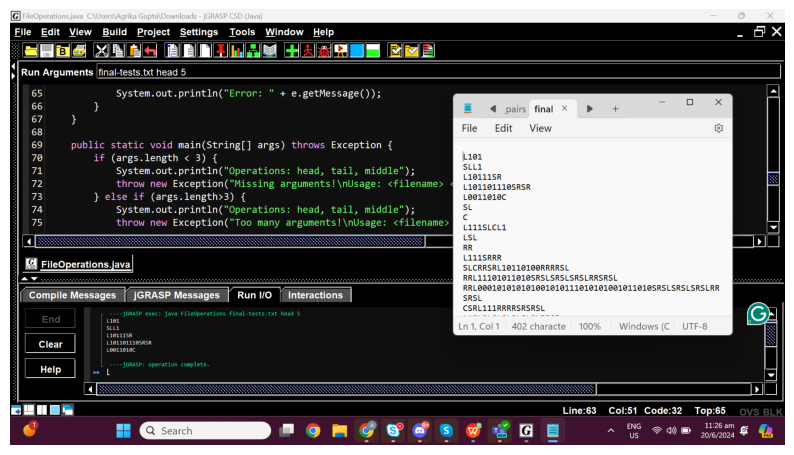

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = 'https://github.com/agrikatheprogrammer/VITON-HD/blob/main/Screenshot%20(499).png?raw=true'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

### Testing tail function

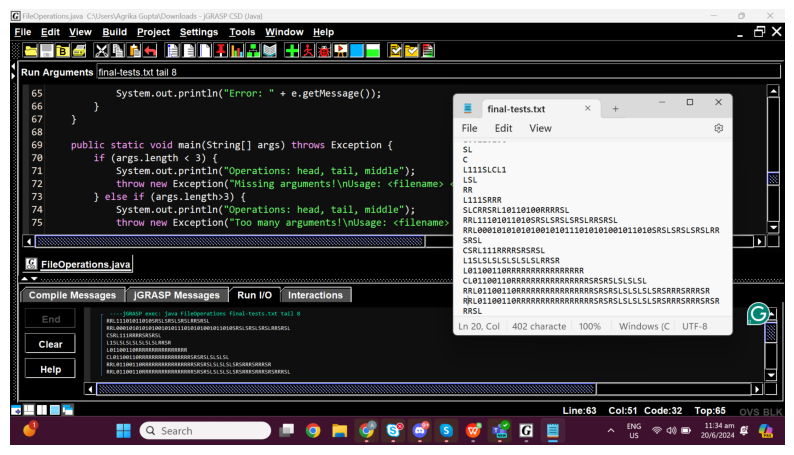

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = 'https://github.com/agrikatheprogrammer/VITON-HD/blob/main/Screenshot%20(500).png?raw=true'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

### Testing middle function

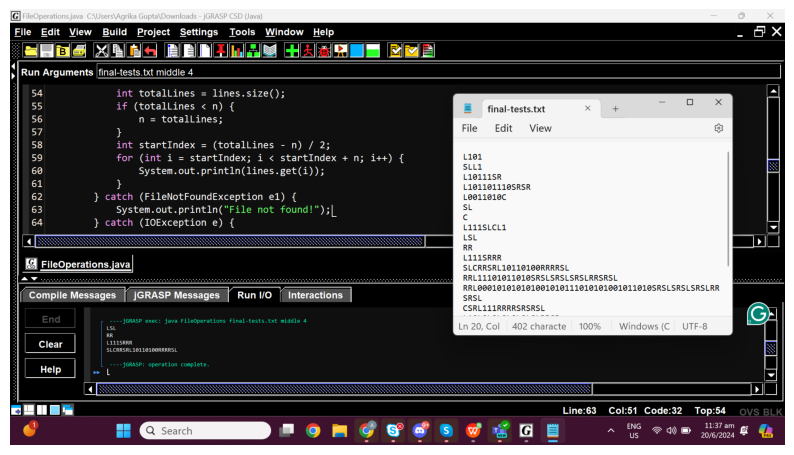

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = 'https://github.com/agrikatheprogrammer/VITON-HD/blob/main/Screenshot%20(501).png?raw=true'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# QUESTION 3



Write a function called SpOdd. The function takes an array of integers as input and return an
array of integers with all odd numbers in original array.
Keep the same order as the original array.

## Python code

In [24]:
def SpOdd(arr):
    return [x for x in arr if x % 2 != 0] #functional programming

### Test function

In [25]:
print(SpOdd([3, 8, 5, 7, 1, 9, 2]))

[3, 5, 7, 1, 9]


Sample output of main function:

Original Array: [3, 8, 5, 7, 1, 9, 2]

Odd elements in the array: [3, 5, 7, 1, 9]

## Java code

    import java.util.ArrayList;
    import java.util.List;
    import java.util.Arrays;

    public class spOdd {

    public static List<Integer> SpOdd(int[] arr) {
        List<Integer> result = new ArrayList<>();
        for (int num : arr) {
            if (num % 2 != 0) {
                result.add(num);
            }
        }
        return result;
    }

    public static void main(String[] args) {
        int[] originalArray = {3, 9, 7, 4, 5, 1, 8, 5, 7, 1, 9, 2};

        System.out.println("Original Array: " + Arrays.toString(originalArray));

        List<Integer> oddElements = SpOdd(originalArray);
        System.out.println("Odd elements in the array: " + oddElements.toString());
    }
    }


### Java code output

Original Array: [3, 9, 7, 4, 5, 1, 8, 5, 7, 1, 9, 2]

Odd elements in the array: [3, 9, 7, 5, 1, 5, 7, 1, 9]

# QUESTION 4


Write Verilog code to describe the following functions:

f1=x1⋅(∼x3)+x2⋅(∼x3)+(∼x3)⋅(∼x4)+x1⋅x2+x1⋅(∼x4)

f2=(x1+(∼x3))⋅(x1+x2+(∼x4))⋅(x2+(∼x3)+(∼x4))

## Verilog code

    module boolean_functions(
    input wire x1,
    input wire x2,
    input wire x3,
    input wire x4,
    output reg f1_output,
    output reg f2_output
    );

    // Function f1
    always @* begin
        f1_output = (x1 & ~x3) | (x2 & ~x3) | (~x3 & ~x4) | (x1 & x2) | (x1 & ~x4);
    end

    // Function f2
    always @* begin
        f2_output = (x1 | ~x3) & (x1 | x2 | ~x4) & (x2 | ~x3 | ~x4);
    end

    endmodule

### Test verilog code

    module testbench;

    // Inputs
    reg x1, x2, x3, x4;
    // Outputs
    wire f1_output, f2_output;

    boolean_functions dut (
        .x1(x1),
        .x2(x2),
        .x3(x3),
        .x4(x4),
        .f1_output(f1_output),
        .f2_output(f2_output)
    );

    // Stimulus generation
    initial begin
        // test vectors
        x1 = 1; x2 = 0; x3 = 1; x4 = 0;
        #10;
        $display("x1=%b, x2=%b, x3=%b, x4=%b, f1_output=%b, f2_output=%b",
                 x1, x2, x3, x4, f1_output, f2_output);
        $finish;
    end

    endmodule

#### Test output
x1=1, x2=0, x3=1, x4=0, f1_output=1, f2_output=1
main.v:48: $finish called at 10 (1s)

# QUESTION 5

## Load

    Load the constant 23 into register 4
    li $4, 23

    Copy the contents of register 2 into register 3
    move $3, $2

    Load char (one byte) starting at memory address 244 into register 6
    lb $6, 244($0)

    Load R5 with the word whose memory address is in R1
    lw $5, 0($1)

    Load the word that begins 8 bytes after the address in R1. This is known as "constant offset"
    mode and is about the fanciest addressing mode a RISC processor will support.
    lw $2, 8($1)

## Store

    Store the constant number 37 into the word beginning at 400
    li $8, 37
    sw $8, 400($0)  

    Store the value in R6 into the word whose address is in R1
    sw $6, 0($1)

    Store lower half-word from R2 into 2 bytes starting at address 1024
    sh $2, 1024($0)

    Store R7 into the word whose address is 12 more than the address in R1
    sw $7, 12($1)


## ALU

    Add 6 to R3 and store the result in R1
    addi $1, $3, 6  

    Subtract R3 from R2 and store the result in R1
    sub $1, $2, $3   

## Branching

    Begin executing at address 344 if R1 equals 0
    beq $1, $0, 344($0)  

    Begin executing at addr 8 past current instruction if R2 less than R3
    blt $2, $3, Label
    <some instruction>
    Label:
    <some instruction>

    blt is psuedo-instruction which uses slt and bne/beq behind the scenes  

## Jump

    Begin executing at address 2000 unconditionally- like a goto
    j 2000

    Begin executing at address 12 before current instruction
    Label:
    <some instruction>
    <some instruction>
    <some instruction>
    j Label

## Data conversion

    Convert integer in R3 to float and store in R2
    mtc1 $3, $f0  
    cvt.s.w $f0, $f0
    mfc1 $2, $f0

    Take bits in R4, convert from float to int, and store back in same. Note that converting in this
    direction loses information, the fractional component is truncated and lost.
    mtc1 $4, $f2    
    cvt.w.s $f2, $f2  
    mfc1 $4, $f2


